In [25]:
#load library and create subsets
library(dplyr)

samples <- read.table('both_samples_condition.tsv')

bsamples <- samples %>% filter(tissue == "brain")
gsamples <- samples %>% filter(tissue == "gut")
gundiffsamples <- samples %>% filter(tissue == "gut", organoid_stage == "undiff")
gdiffsamples <- samples %>% filter(tissue == "gut", organoid_stage == "diff")

In [26]:
gundiffsamples

,condition,replicate,organoid_stage,id,name,tissue
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
S10,VA1,3,undiff,S10,VA1_gut_undiff_S10,gut
S11,HAstV4,2,undiff,S11,HAstV4_gut_undiff_S11,gut
S12,HAstV4,3,undiff,S12,HAstV4_gut_undiff_S12,gut
S4,MLB2,1,undiff,S4,MLB2_gut_undiff_S4,gut
S5,MLB2,2,undiff,S5,MLB2_gut_undiff_S5,gut
S6,MLB2,3,undiff,S6,MLB2_gut_undiff_S6,gut
S1,Mock,1,undiff,S1,Mock_gut_undiff_S1,gut
S2,Mock,2,undiff,S2,Mock_gut_undiff_S2,gut
S3,Mock,3,undiff,S3,Mock_gut_undiff_S3,gut


In [27]:
gpccounts = as.matrix(read.csv('../../output/gut/counts_protein_coding.csv',row.names = 1))
dim(gpccounts)

[1] 20070    24

In [5]:
library(DESeq2)
colours = c(
    HAstV4_diff='#b80101',
    HAstV4='#ff9301',
    HAstV4_undiff='#ffc101',
    MLB2_diff='#7b0fa6',
    MLB2='#592bf5',
    MLB2_undiff='#679ffa',
    VA1_diff='#1a5d3a',
    VA1='#1fbd6b',
    VA1_undiff='#82de25',
    Mock_diff='#4b4b49',
    Mock='#919190',
    Mock_undiff='#c5c5c0',
    diff='#aa05b2',
    undiff='#f68ed7')


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:utils’:

    findMatches


The following objects are m

In [28]:
#colnames(bpccounts) == rownames(bsamples)
gpccounts = gpccounts[,rownames(gundiffsamples)]
gpccounts

,S10,S11,S12,S4,S5,S6,S1,S2,S3,S7,S8,S9
ENSG00000142611,247,314,242,382,382,361,450,315,469,374,252,304
ENSG00000157911,94,141,148,170,132,138,175,126,166,179,71,96
ENSG00000142655,73,189,146,74,83,175,116,126,50,104,112,104
ENSG00000149527,0,33,0,3,10,0,14,18,15,27,0,0
ENSG00000171621,91,51,162,168,50,119,173,54,56,97,128,175
ENSG00000142583,26,7,13,14,22,5,17,21,29,12,15,46
ENSG00000173614,74,132,85,136,61,191,113,105,134,50,95,119
ENSG00000162592,0,9,0,6,0,0,0,0,9,0,0,0
ENSG00000204624,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000142606,38,21,15,74,19,58,19,0,61,24,31,20


In [29]:
colnames(gpccounts)
rownames(gundiffsamples)

[1] "S10" "S11" "S12" "S4"  "S5"  "S6"  "S1"  "S2"  "S3"  "S7"  "S8"  "S9"

[1] "S10" "S11" "S12" "S4"  "S5"  "S6"  "S1"  "S2"  "S3"  "S7"  "S8"  "S9"

In [31]:
rownames(gundiffsamples) = colnames(gpccounts) = gundiffsamples$name
deseq = DESeqDataSetFromMatrix(countData = gpccounts,
                              colData = gundiffsamples,
                               design = ~ condition)
deseq

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 20070 12 
metadata(1): version
assays(1): counts
rownames(20070): ENSG00000142611 ENSG00000157911 ... ENSG00000268674
  ENSG00000277475
rowData names(0):
colnames(12): VA1_gut_undiff_S10 HAstV4_gut_undiff_S11 ...
  VA1_gut_undiff_S8 HAstV4_gut_undiff_S9
colData names(6): condition replicate ... name tissue


FALSE  TRUE 
 6160 13910 

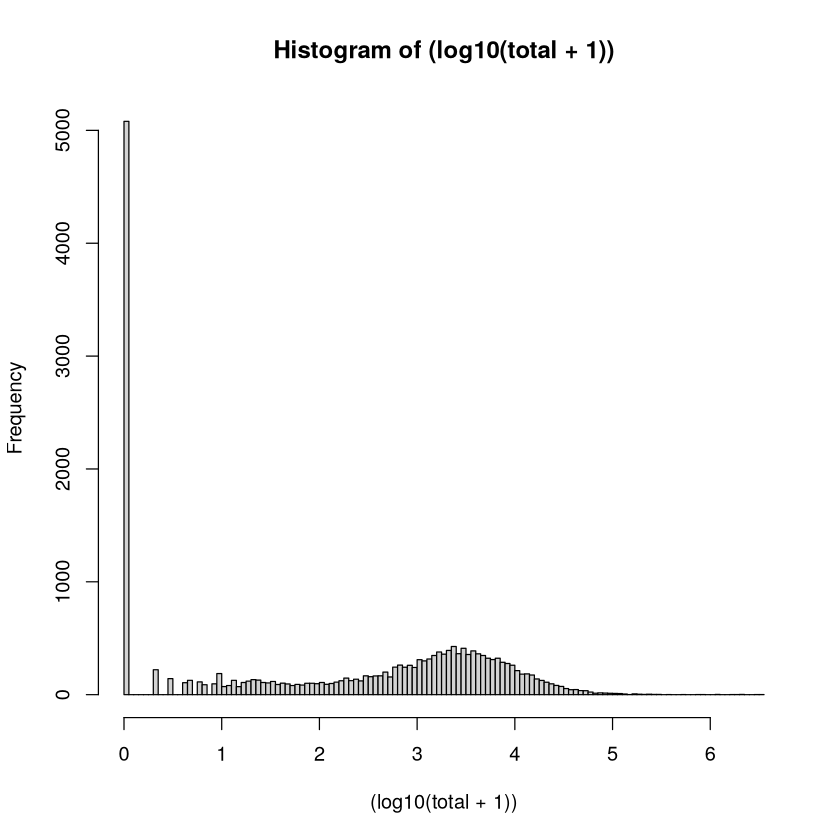

In [32]:
# filter genes by total read counts (true if >10 reads)
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 120)
total = rowSums(counts(deseq))
hist((log10(total + 1)),100)
table(total>=10)

In [33]:
# filter genes (Counting the number of samples where each gene has ≥10 reads (e.g., 459 genes have ≥10 reads in two samples))
ngundiffsamples10 = rowSums(counts(deseq)>=10)
table(ngundiffsamples10)

ngundiffsamples10
   0    1    2    3    4    5    6    7    8    9   10   11   12 
6463  873  419  269  214  197  197  193  238  226  314  510 9957 

In [34]:
dim(deseq)

[1] 20070    12

In [12]:
# remove genes with less than 10 reads in total in at least 2 samples.
deseq = deseq[ngundiffsamples10>=2,]
deseq

class: DESeqDataSet 
dim: 12734 12 
metadata(1): version
assays(1): counts
rownames(12734): ENSG00000142611 ENSG00000157911 ... ENSG00000278384
  ENSG00000271254
rowData names(0):
colnames(12): VA1_gut_undiff_S10 HAstV4_gut_undiff_S11 ...
  VA1_gut_undiff_S8 HAstV4_gut_undiff_S9
colData names(6): condition replicate ... name tissue

In [35]:
#pre-filtering, to keep genes that have at least 10 reads in 3 or more samples
smallestGroupSize <- 3
keep <- rowSums(counts(deseq) >= 10) >= smallestGroupSize
deseq <- deseq[keep,]

In [36]:
dim(deseq)

[1] 12315    12

In [ ]:
all viruses together

In [37]:
deseq = DESeq(deseq)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [50]:
cnds = c('MLB2','VA1','HAstV4')
res = lapply(cnds,function(c)results(deseq,contrast = c('condition','Mock',c)))
names(res) = cnds

In [51]:
res

$MLB2
log2 fold change (MLE): condition Mock vs MLB2 
Wald test p-value: condition Mock vs MLB2 
DataFrame with 12315 rows and 6 columns
                  baseMean log2FoldChange     lfcSE       stat    pvalue
                 <numeric>      <numeric> <numeric>  <numeric> <numeric>
ENSG00000142611  332.03747      0.0190699  0.207619  0.0918509  0.926817
ENSG00000157911  131.82447     -0.0162540  0.325888 -0.0498760  0.960221
ENSG00000142655  111.76362     -0.2608003  0.453924 -0.5745459  0.565598
ENSG00000149527    9.56838      1.7543252  2.701744  0.6493307  0.516125
ENSG00000171621  108.73329     -0.3656743  0.520700 -0.7022743  0.482508
...                    ...            ...       ...        ...       ...
ENSG00000198727 91185.5659     -0.0693728 0.0762288 -0.9100593  0.362791
ENSG00000276256    25.0797      0.3108140 0.8821449  0.3523389  0.724584
ENSG00000273748    45.5163      0.4347423 0.6779253  0.6412835  0.521339
ENSG00000278817    13.9926      0.4284192 2.4735840  0.17319

In [54]:
sapply(res,function(x){
    c(sign=sum(x$padj<0.05 & abs(x$log2FoldChange)>1,na.rm=T))
})

MLB2.sign    VA1.sign HAstV4.sign 
          1         185         534

In [40]:
sapply(res, function(x) sum(is.na(x$padj)))

MLB2    VA1 HAstV4 
  9073      1      1

In [41]:
summary(res$MLB2)



out of 12315 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 69, 0.56%
LFC < 0 (down)     : 61, 0.5%
outliers [1]       : 1, 0.0081%
low counts [2]     : 9072, 74%
(mean count < 447)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [42]:
#using gut_genes, since brain's one was confused.
ggenes = read.csv('../../output/gut/gut_genes.csv',row.names = 1)
ggenes[1:4,]

,chr,start,end,strand,gene_id,gene_name,gene_biotype
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
ENSG00000279928,1,182696,184174,+,ENSG00000279928,DDX11L17,unprocessed_pseudogene
ENSG00000228037,1,2581560,2584533,+,ENSG00000228037,NA,lncRNA
ENSG00000142611,1,3069168,3438621,+,ENSG00000142611,PRDM16,protein_coding
ENSG00000284616,1,5301928,5307394,-,ENSG00000284616,NA,lncRNA


In [44]:
lapply(res,function(x){
    f = x$padj<0.1
    f[is.na(f)] = FALSE
    x = as.data.frame(x[f,c(1,2,6)])
    x$gene_name = ggenes[rownames(x),'gene_name']
    x[order(x$log2FoldChange),]
})

,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000137959,637.5362,-2.8641275,0.0095183036,IFI44L
ENSG00000138646,952.6269,-1.5401751,0.0889707279,HERC5
ENSG00000148346,561.0226,-0.8884668,0.0001457001,LCN2
ENSG00000111331,1134.8166,-0.8726494,0.0069989262,OAS3
ENSG00000125144,2672.8288,-0.8663712,0.0824872060,MT1G
ENSG00000130332,547.7296,-0.7557464,0.0211241027,LSM7
ENSG00000125378,799.8177,-0.7331621,0.0095183036,BMP4
ENSG00000130826,670.7058,-0.7240327,0.0193040231,DKC1
ENSG00000008441,552.2687,-0.6497432,0.0809616091,NFIX


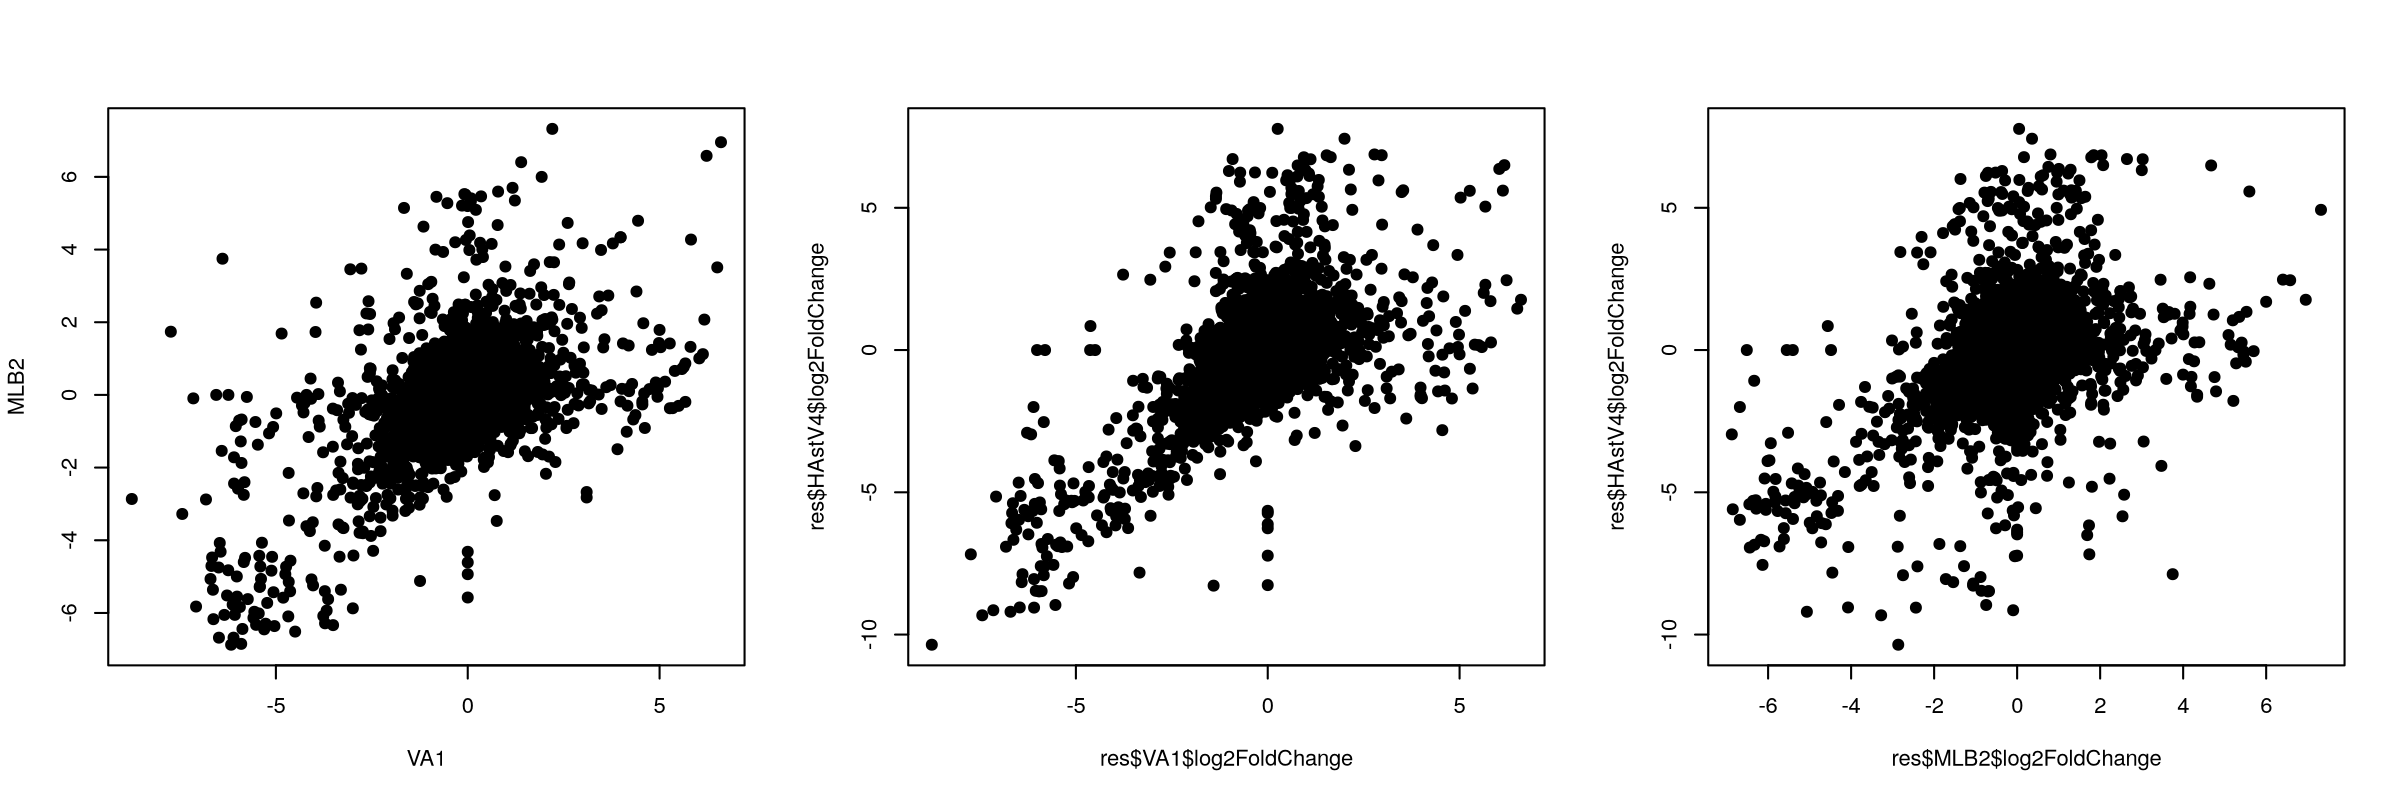

In [45]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)
par(mfrow=c(1,3))
plot(res$VA1$log2FoldChange,res$MLB2$log2FoldChange,pch=19,xlab='VA1',ylab='MLB2')
plot(res$VA1$log2FoldChange,res$HAstV4$log2FoldChange,pch=19)
plot(res$MLB2$log2FoldChange,res$HAstV4$log2FoldChange,pch=19)

In [46]:
f = res$MLB2$log2FoldChange>5 & res$VA1$log2FoldChange>5
sel = res$VA1[f,]
cbind(sel,ggenes[rownames(sel),'gene_name'])

DataFrame with 2 rows and 7 columns
                 baseMean log2FoldChange     lfcSE      stat    pvalue
                <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000146267   4.87637        6.22526   2.49743   2.49267 0.0126787
ENSG00000196787   6.92157        6.60054   3.92917   1.67988 0.0929809
                     padj ggenes[rownames(sel), "gene_name"]
                <numeric>                        <character>
ENSG00000146267  0.171243                               FAXC
ENSG00000196787  0.497379                             H2AC11

one by one virus

In [48]:
cnds = c('MLB2','VA1','HAstV4')
res2 = lapply(cnds,function(c){
    f = gsamples$condition %in% c('Mock',c)
    x = DESeqDataSetFromMatrix(countData = gpccounts[rownames(deseq),f],
                              colData = gundiffsamples[f,],
                               design = ~ condition)
    x = DESeq(x)
    results(x,contrast = c('condition','Mock',c))
    })
names(res2) = cnds

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'ncol': (subscript) logical subscript too long


In [78]:
sapply(res2,function(x){
    c(sign=sum(x$padj<0.05 & abs(x$log2FoldChange)>0,na.rm=T))
})

MLB2.sign    VA1.sign HAstV4.sign 
          7           0           2

In [80]:
lapply(res2,function(x){
    f = x$padj<0.05 & abs(x$log2FoldChange)>0
    f[is.na(f)] = FALSE
    x = as.data.frame(x[f,c(1,2,6)])
    x$gene_name = ggenes[rownames(x),'gene_name']
    x[order(x$log2FoldChange),]
})

$MLB2
                  baseMean log2FoldChange         padj gene_name
ENSG00000120549   50.11983     -4.3107052 9.116530e-03  KIAA1217
ENSG00000113916  329.08347     -1.7771185 9.116530e-03      BCL6
ENSG00000175745 2845.38028     -1.3114488 2.855825e-10     NR2F1
ENSG00000185551  784.99483     -1.2094494 1.251884e-02     NR2F2
ENSG00000155760  743.14437     -1.1657653 1.612199e-02      FZD7
ENSG00000076356  866.34010     -0.9563526 1.251884e-02    PLXNA2
ENSG00000150471 1322.71527     -0.8491035 1.694817e-02    ADGRL3

$VA1
[1] baseMean       log2FoldChange padj           gene_name     
<0 rows> (or 0-length row.names)

$HAstV4
                 baseMean log2FoldChange        padj gene_name
ENSG00000134996  29.80181      -8.276538 0.026715567     OSTF1
ENSG00000168298 260.86893       1.967433 0.003780188      H1-4

In [81]:
lapply(res,function(x){
    f = x$padj<0.05 & abs(x$log2FoldChange)>1
    f[is.na(f)] = FALSE
    x = as.data.frame(x[f,c(1,2,6)])
    x$gene_name = ggenes[rownames(x),'gene_name']
    x[order(x$log2FoldChange),]
})

$MLB2
                baseMean log2FoldChange      padj gene_name
ENSG00000120549 56.63175      -4.308327 0.0439467  KIAA1217

$VA1
[1] baseMean       log2FoldChange padj           gene_name     
<0 rows> (or 0-length row.names)

$HAstV4
                 baseMean log2FoldChange        padj gene_name
ENSG00000134996  22.01903      -8.276014 0.011766177     OSTF1
ENSG00000117707  71.74382      -2.909794 0.011766177     PROX1
ENSG00000168298 251.87897       1.967959 0.001240352      H1-4

#res and res2 - data from "all virus together' and "one virus by one"